# Bayesian Linear Regression

## Probabilistic regression I (maximum likelihood)

I will show you how to derive least squares from the [maximum likelihood principle](maximum-likelihood-principle).
Recall that the maximum likelihood principle states that you should pick the model parameters that maximize the probability of the data conditioned on the parameters.

Just like before assume that we have $n$ observations of inputs $\mathbf{x}_{1:n}$ and outputs $\mathbf{y}_{1:n}$.
We model the map between inputs and outputs using a generalized linear model with $m$ basis functions:

$$
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w}^T\boldsymbol{\phi}(\mathbf{x})
$$

Now, here is the difference from what we did before.
Instead of directly picking a loss function to minimize, we develop a probabilistic description of the measurement process.
In particular, we *model the measurement process* using a **likelihood** function:

$$
\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w} \sim p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}).
$$

What is the interpretation of the likelihood function?
Well, $p(\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w})$ tells us how plausible is it to observe $\mathbf{y}_{1:n}$ at inputs $\mathbf{x}_{1:n}$, if we know that the model parameters are $\mathbf{w}$.

The most common choice for the likelihood of a single measurement is to pick it to be Gaussian with mean around the model prediction $\mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})}$ and noise variance $\sigma^2$.
Mathematically, we have:

$$
\begin{split}
p(y_i|\mathbf{x}_i, \mathbf{w}, \sigma) &= N\left(y_i| y(\mathbf{x}_i;\mathbf{w}), \sigma^2\right)\\
&= N\left(y_i | \mathbf{w}^{T}\boldsymbol{\phi}(\mathbf{x}_i), \sigma^2\right),
\end{split}
$$

where $\sigma^2$ models the **variance of the measurement noise**.
Note that here I used the notation $N(y|\mu,\sigma^2)$ to denote the PDF of a Normal with mean $\mu$ and variance $\sigma^2$, i.e.,

$$
N(y|\mu,\sigma^2) := (2\pi\sigma^2)^{-\frac{1}{2}}\exp\left\{-\frac{(y-\mu)^2}{2\sigma^2}\right\}.
$$

Since in almost all the cases we encounter, the measurements are independent when conditioned on the model, the likelihood of the data factorizes as follows:

$$
\begin{split}
p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}) &= \prod_{i=1}^np(y_i|\mathbf{x}_i, \mathbf{w})\\
&= \prod_{i=1}^nN\left(y_i | \mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x}_i)}, \sigma^2\right)\\
&= \prod_{i=1}^n(2\pi\sigma^2)^{-\frac{1}{2}}\exp\left\{-\frac{\left[y_i-\mathbf{w}^{T}\boldsymbol{\phi}(\mathbf{x}_i)\right]^2}{2\sigma^2}\right\}\\
&= (2\pi\sigma^2)^{-\frac{n}{2}}\exp\left\{-\sum_{i=1}^N\frac{\left[y_i-\mathbf{w}^{T}\boldsymbol{\phi}(\mathbf{x}_i)\right]^2}{2\sigma^2}\right\}\\
&= (2\pi\sigma^2)^{-\frac{n}{2}}\exp\left\{-\frac{1}{2\sigma^2}\sum_{i=1}^n\left[y_i-\mathbf{w}^{T}\boldsymbol{\phi}(\mathbf{x}_i)\right]^2\right\}\\
&= (2\pi\sigma^2)^{-\frac{n}{2}}\exp\left\{-\frac{1}{2\sigma^2}\parallel \mathbf{y}_{1:n}-\boldsymbol{\Phi}\mathbf{w}\parallel^2\right\},
\end{split}
$$

where $\boldsymbol{\Phi}$ is the $n\times m$ design matrix.

We can apply the maximum likelihood principle to find all the parameters.
We can do this for the weight vector $\mathbf{w}$ and the measurement variance $\sigma^2$.
We need to solve the following optimization problem:

$$
\max_{\mathbf{w},\sigma^2}\log p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}) =
\max_{\mathbf{w},\sigma^2}\left\{
-\frac{n}{2}\log (2\pi) - \frac{n}{2}\log \sigma^2 -\frac{1}{2\sigma^2}\parallel \mathbf{y}_{1:n}-\boldsymbol{\Phi}\mathbf{w}\parallel^2
 \right\}
$$

Notice that the rightmost part is the negative of the sum of square errors.
So, by maximizing the likelihood with respect to $\mathbf{w}$, we are minimizing the sum of square errors.
In other words,  the maximum likelihood and the least square weights are the same!
We do not even have to do anything further.
The weights should satisfy this linear system:

$$
\boldsymbol{\Phi}^T\boldsymbol{\Phi}\mathbf{w} = \boldsymbol{\Phi}^T\mathbf{y}_{1:n}.
$$

This result is reassuring.
The probabilistic interpretation above gives the same solution as least squares!
But there is more.
Notice that it can also give us an estimate for the measurement noise variance $\sigma^2$.
All you have to do is maximize likelihood with respect to $\sigma^2$.
If we take the derivative of the log-likelihood with respect to $\sigma^2$, set it equal to zero, and solve for $\sigma^2$, we get:

$$
\sigma^2 = \frac{\parallel\mathbf{\Phi}\mathbf{w} - \mathbf{y}_{1:n}\parallel^2}{n}.
$$

Finally, you can incorporate this measurement uncertainty when you are making predictions.
We do this through the **point predictive distribution**, which is Gaussian in our case:

$$
p(y|\mathbf{x}, \mathbf{w}, \sigma^2) = N\left(y\middle|\mathbf{w}^T\mathbf{\phi}(\mathbf{x}), \sigma^2\right).
$$

In other words, your prediction about the measured output $y$ is that it is Normally distributed around your model prediction with a variance $\sigma^2$.
You can use this to find a 95% credible interval.

### Examples

See [this example](max_like_example).

## Probabilistic regression II (maximum a posteriori estimates)

This version of probabilistic regression is similar to maximum likelihood in that you maximize the log probability of something (the posterior instead of the likelihood) and has the benefit that it can help you avoid overfitting.

Just like before, we wish to model the data using some **fixed** basis/features:

$$
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})
}
$$

Again, we *model the measurement process* using a **likelihood** function:

$$
\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w}, \sigma \sim N(\mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})
}, \sigma^2).
$$

The new ingredient is that we *model the uncertainty in the model parameters* using a **prior**:

$$
\mathbf{w} \sim p(\mathbf{w}).
$$

### Gaussian Prior on the Weights
The Gaussian prior is the most straightforward possible choice for the weights.
It is:

$$
p(\mathbf{w}|\alpha) = N\left(\mathbf{w}|\mathbf{0},\alpha^{-1}\mathbf{I}\right) = 
\left(\frac{\alpha}{2\pi}\right)^{\frac{m}{2}}\exp\left\{-\frac{\alpha}{2}\lVert\mathbf{w}\rVert^2\right\}.
$$

The interpretation is that, before we see the data, we believe that $\mathbf{w}$ must be around zero with a precision of $\alpha$.
This push for the weights to be towards zero helps us avoid overfitting.
The bigger the precision parameter $\alpha$, the more the weights are pushed towards zero.

### Graphical representation of the model
Let's visualize the regression model as a graph.
Remember that the shaded nodes are assumed to be observed (so below, we assume that we know $\alpha$ and $\sigma$).
Another thing to observe is that the nodes inside the box are repeated as many times as indicated. 
Recall that we are using the [plate notation](https://en.wikipedia.org/wiki/Plate_notation) for graphical models, and it saves from the trouble of drawing $n$ input-output nodes.

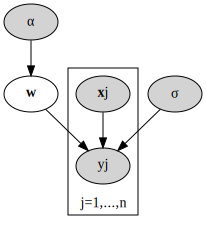

In [ ]:
import numpy as npimport scipy.stats as stfrom graphviz import Digraphg = Digraph('bayes_regression')g.node('alpha', label='<&alpha;>', style='filled')g.node('w', label='<<b>w</b>>')g.node('sigma', label='<&sigma;>', style='filled')with g.subgraph(name='cluster_0') as sg:    sg.node('xj', label='<<b>x</b><sub>j</sub>>', style='filled')    sg.node('yj', label='<y<sub>j</sub>>', style='filled')    sg.attr(label='j=1,...,n')    sg.attr(labelloc='b')g.edge('alpha', 'w')g.edge('sigma', 'yj')g.edge('w', 'yj')g.edge('xj', 'yj')g.render('bayes_regression', format='png')g

### The Posterior of the Weights

Combining the likelihood and the prior, we get using Bayes' rule:

$$
p(\mathbf{w}|\mathbf{x}_{1:n},\mathbf{y}_{1:n}, \sigma,\alpha) = 
\frac{p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}, \sigma)p(\mathbf{w}|\alpha)}
{\int p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}', \sigma)p(\mathbf{w}'|\alpha)d\mathbf{w}'}.
$$

The posterior summarizes our state of knowledge about $\mathbf{w}$ after we see the data,
if we know $\alpha$ and $\sigma$.

### Maximum Posterior Estimate
We can find a point estimate of $\mathbf{w}$ by solving:

$$
\mathbf{w}_{\text{MPE}} = \arg\max_{\mathbf{w}} p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}, \sigma)p(\mathbf{w}|\alpha).
$$

For Gaussian likelihood and weight prior, the logarithm of the posterior is:

$$
\log p(\mathbf{w}|\mathbf{x}_{1:n},\mathbf{y}_{1:n}, \sigma,\alpha) = 
- \frac{1}{2\sigma^2}\lVert\mathbf{\Phi}\mathbf{w}-\mathbf{y}_{1:n}\rVert^2 -\frac{\alpha}{2}\lVert\mathbf{w}\rVert^2.
$$

Taking derivatives with respect to $\mathbf{w}$ and setting them equal to zero (necessary condition), we find:

$$
\mathbf{w}_{\text{MPE}} = \sigma^{-2}\left(\sigma^{-2}\mathbf{\Phi}^T\mathbf{\Phi}+\alpha\mathbf{I}\right)^{-1}\mathbf{\Phi}^T\mathbf{y}_{1:n}.
$$

Unfortunately, we no longer have an analytic formula for $\sigma$ (we will fix that later).

### Examples

See [this example](max_post_example).

## Probabilistic regression III (Bayesian linear regression)

This type of regression has the same setup as version III of probabilistic regression, but we do not get a point estimate for the weights.
We retain the posterior of the weights in its full complexity.
The benefit is that we can now quantify the epistemic uncertainty induced by the limited number of observations used to estimate the weights.

For Gaussian likelihood and weight prior, the posterior of the weights is Gaussian:

$$
p(\mathbf{w}|\mathbf{x}_{1:n},\mathbf{y}_{1:n}, \sigma, \alpha) = N\left(\mathbf{w}|\mathbf{m}, \mathbf{S}\right),
$$

where

$$
\mathbf{S} = \left(\sigma^{-2}\mathbf{\Phi}^T\mathbf{\Phi}+\alpha\mathbf{I}\right)^{-1},
$$

and

$$
\mathbf{m} = \sigma^{-2}\mathbf{S}\Phi^T\mathbf{y}_{1:n}.
$$

The posterior will not be analytically available in the general case of non-Gaussian likelihood (and non-linear models). We will learn how to deal with these cases in Lectures 27 and 28 when discussing generic ways to characterize posteriors.

(posterior-predictive)=
### Posterior Predictive Distribution
Using probability theory, we ask: What do we know about $y$ at a new $\mathbf{x}$ after seeing the data?
To answer this question, we use the sum rule:

$$
p(y|\mathbf{x}, \mathbf{x}_{1:n}, \mathbf{y}_{1:n}, \sigma, \alpha) = 
\int p(y | \mathbf{x}, \mathbf{w}, \sigma) p(\mathbf{w}|\mathbf{x}_{1:n}, \mathbf{y}_{1:n},\sigma,\alpha)d\mathbf{w}.
$$

For the all-Gaussian case, this is analytically available:

$$
p(y|\mathbf{x}, \mathbf{x}_{1:n}, \mathbf{y}_{1:n}, \sigma, \alpha) = N\left(y|m(\mathbf{x}), s^2(\mathbf{x})\right),
$$

where

$$
m(\mathbf{x}) = \mathbf{m}^T\boldsymbol{\phi}(\mathbf{x})\;\text{and}\;s(\mathbf{x}) = \boldsymbol{\phi}(\mathbf{x})^T\mathbf{S}\boldsymbol{\phi}(\mathbf{x}) + \sigma^2.
$$

Notice that the **predictive uncertainty** is:

$$
s^2(\mathbf{x}) = \boldsymbol{\phi}(\mathbf{x})^T\mathbf{S}\boldsymbol{\phi}(\mathbf{x}) + \sigma^2,
$$

where:
+ $\sigma^2$ corresponds to the measurement noise.
+ $\boldsymbol{\phi}(\mathbf{x})^T\mathbf{S}\boldsymbol{\phi}(\mathbf{x})$ is the epistemic uncertainty induced by limited data.

### Examples

See [this example](bayesian_linear_regression_example).